In [1]:
import pandas

size_log = pandas.read_pickle("4-generated-mdps/success.pkl.gz")
aborts = pandas.read_pickle("4-generated-mdps/fail.pkl.gz")

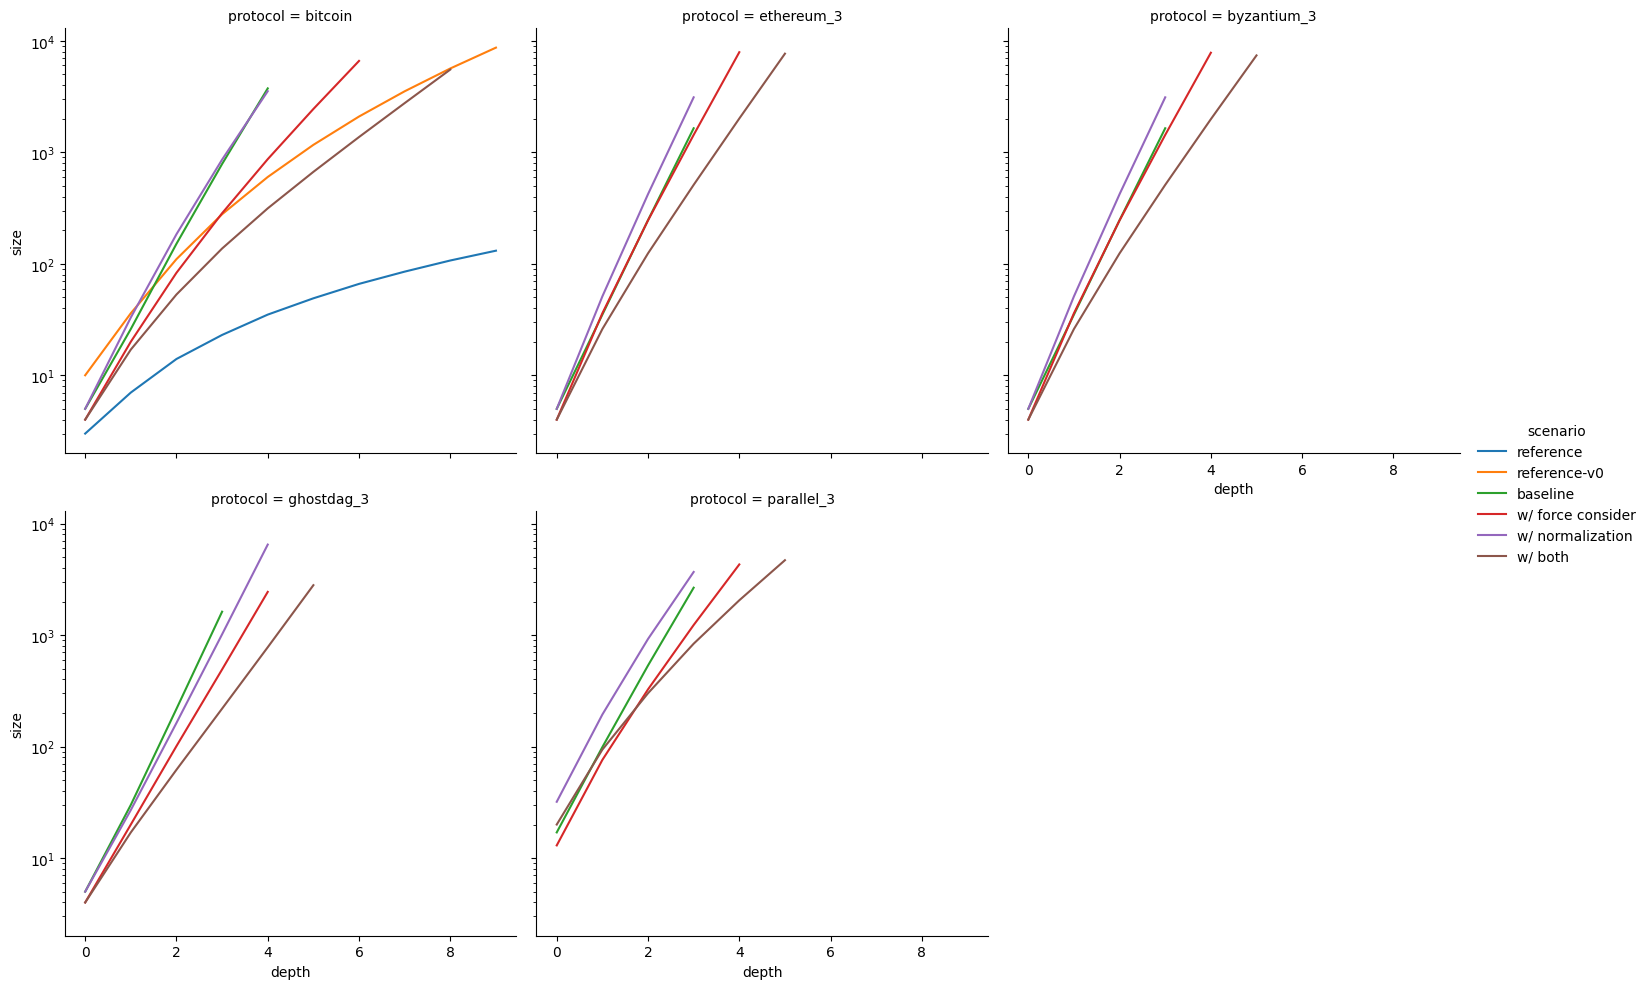

In [2]:
import seaborn

seaborn.relplot(
    data=size_log.query("depth < 10"),
    kind="line",
    x="depth",
    y="size",
    hue="scenario",
    col="protocol",
    col_wrap=3,
).set(yscale="log")

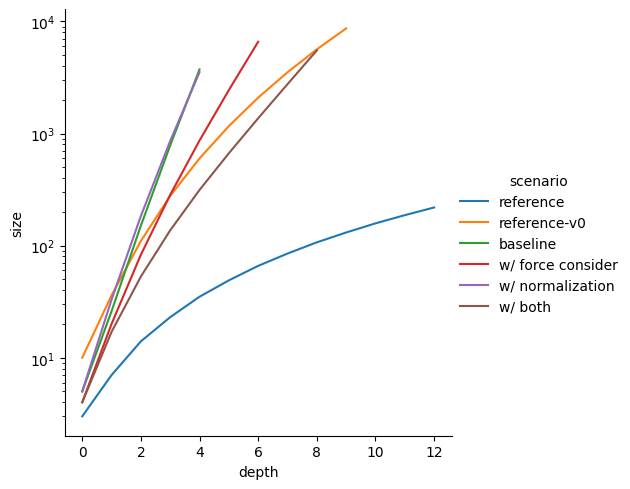

In [3]:
seaborn.relplot(
    data=size_log.query("protocol == 'bitcoin' and depth < 13"),
    kind="line",
    x="depth",
    y="size",
    hue="scenario",
).set(yscale="log")

In [4]:
scenario_labels = {
    "reference": "reference-fc16",
    "reference-v0": "drop",
    "baseline": "baseline",
    "w/o garbage collection": "baseline-gc",
    "w/ force consider": "baseline+fc",
    "w/ normalization": "baseline+n",
    "w/ both": "baseline+fc+n",
}

depth_cutoff = max(size_log.query("scenario != 'reference'").depth) + 1

btc_size = (
    size_log.assign(scenario=[scenario_labels[x] for x in size_log.scenario])
    .query("scenario != 'drop'")
    .query("protocol == 'bitcoin'")
    .query(f"depth <= {depth_cutoff}")
    .pivot(index="depth", columns="scenario", values="size")
)

btc_size.to_csv("5-state-space-exploration-viz-for-paper-btc-size.csv")
btc_size

scenario,baseline,baseline+fc,baseline+fc+n,baseline+n,reference-fc16
depth,,,,,
0,5.0,4.0,4.0,5.0,3.0
1,26.0,20.0,17.0,33.0,7.0
2,151.0,83.0,53.0,184.0,14.0
3,785.0,284.0,137.0,859.0,23.0
4,3737.0,867.0,314.0,3529.0,35.0
5,NaN,2443.0,667.0,NaN,49.0
6,NaN,6591.0,1369.0,NaN,66.0
7,NaN,NaN,2758.0,NaN,85.0
8,NaN,NaN,5517.0,NaN,107.0


In [5]:
# how should we report on the other protocols?
# column a: show max depth explored in table for fully optimized exploration only; calculate blow up factor and add as columns


def tabulate_deepest(d):
    return d.iloc[d.groupby(["scenario", "protocol"]).depth.idxmax()]


deepest = (
    tabulate_deepest(size_log)
    .reset_index(drop=True)
    .query("scenario != 'w/o garbage collection'")
    .query("scenario != 'reference-v0'")
)

deepest.to_pickle("4-generated-mdps/deepest.pkl.gz")

deepest

,scenario,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,depth,size,time_spent,rss,mdp
0,baseline,generic_1,False,False,True,True,False,bitcoin,4,3737,1.924592,0.142128,54d1a8d6
1,baseline,generic_1,False,False,True,True,False,byzantium_3,3,1641,1.408474,0.148083,60ba6349
2,baseline,generic_1,False,False,True,True,False,ethereum_3,3,1641,1.362358,0.144905,62a14578
3,baseline,generic_1,False,False,True,True,False,ghostdag_3,3,1621,1.690047,0.149612,7b848f4a
4,baseline,generic_1,False,False,True,True,False,parallel_3,3,2660,1.730012,0.153915,16eba64d
5,reference,fc16sapirshtein,True,True,True,True,True,bitcoin,88,9947,22.856685,0.143162,2df9b138
7,w/ both,generic_1,True,True,True,True,False,bitcoin,8,5517,6.976263,0.173187,5fe5e798
8,w/ both,generic_1,True,True,True,True,False,byzantium_3,5,7385,11.256519,0.197044,78b61925
9,w/ both,generic_1,True,True,True,True,False,ethereum_3,5,7656,10.351867,0.199928,44741f97
10,w/ both,generic_1,True,True,True,True,False,ghostdag_3,5,2802,5.999262,0.175503,211725fa


In [6]:
# how should we report on the other protocols?
# column b: fix depth in table

fixed_depth = min(deepest.depth)
fixed = (
    size_log.query("scenario != 'w/o garbage collection'")
    .query("scenario != 'reference-v0'")
    .query(f"depth == {fixed_depth}")
    .reset_index(drop=True)
)
fixed.to_pickle("4-generated-mdps/fixed.pkl.gz")
fixed

,scenario,model,force_consider_own,merge_isomorphic,truncate_common_chain,collect_garbage,reward_common_chain,protocol,depth,size,time_spent,rss,mdp
0,reference,fc16sapirshtein,True,True,True,True,True,bitcoin,3,23,0.133204,0.108444,184467e1
1,baseline,generic_1,False,False,True,True,False,bitcoin,3,785,0.429754,0.136513,3dc97d15
2,baseline,generic_1,False,False,True,True,False,ethereum_3,3,1641,1.362358,0.144905,62a14578
3,baseline,generic_1,False,False,True,True,False,byzantium_3,3,1641,1.408474,0.148083,60ba6349
4,baseline,generic_1,False,False,True,True,False,ghostdag_3,3,1621,1.690047,0.149612,7b848f4a
5,baseline,generic_1,False,False,True,True,False,parallel_3,3,2660,1.730012,0.153915,16eba64d
6,w/ force consider,generic_1,True,False,True,True,False,bitcoin,3,284,0.678282,0.151142,505b1cc2
7,w/ force consider,generic_1,True,False,True,True,False,ethereum_3,3,1431,1.552961,0.155033,754a6c90
8,w/ force consider,generic_1,True,False,True,True,False,byzantium_3,3,1431,1.763898,0.157867,71f0976e
9,w/ force consider,generic_1,True,False,True,True,False,ghostdag_3,3,492,1.028232,0.158596,78870307


In [7]:
combined = pandas.DataFrame(
    dict(
        max_depth=deepest.set_index(["scenario", "protocol"]).depth,
        size_at_fixed_depth=fixed.set_index(["scenario", "protocol"])["size"],
    )
).reset_index()
combined

,scenario,protocol,max_depth,size_at_fixed_depth
0,baseline,bitcoin,4,785
1,baseline,byzantium_3,3,1641
2,baseline,ethereum_3,3,1641
3,baseline,ghostdag_3,3,1621
4,baseline,parallel_3,3,2660
5,reference,bitcoin,88,23
6,w/ both,bitcoin,8,137
7,w/ both,byzantium_3,5,510
8,w/ both,ethereum_3,5,510
9,w/ both,ghostdag_3,5,219


In [8]:
fixed_depth

3

In [9]:
combined.query('scenario != "reference"').set_index(["scenario", "protocol"]).unstack(
    level=0
).stack(level=0, future_stack=True).unstack(level=1)

scenario     baseline                       w/ both                      \
            max_depth size_at_fixed_depth max_depth size_at_fixed_depth   
protocol                                                                  
bitcoin             4                 785         8                 137   
byzantium_3         3                1641         5                 510   
ethereum_3          3                1641         5                 510   
ghostdag_3          3                1621         5                 219   
parallel_3          3                2660         5                 837   

scenario    w/ force consider                     w/ normalization  \
                    max_depth size_at_fixed_depth        max_depth   
protocol                                                             
bitcoin                     6                 284                4   
byzantium_3                 4                1431                3   
ethereum_3                  4                1431                3   
ghostdag_3                  4                 492                4   
parallel_3                  4                1231                3   

scenario                         
            size_at_fixed_depth  
protocol                         
bitcoin                     859  
byzantium_3                3108  
ethereum_3                 3108  
ghostdag_3                 1016  
parallel_3                 3681